In [8]:
#1)Read an image and convert it into gray scale image without using builtin function for the
#function

import numpy as np
from PIL import Image
def read_image(file_path):
    with open(file_path, 'rb') as f:
       img = Image.open(f)
       img_array = np.array(img)
    return img_array
def convert_to_grayscale(img_array):
    if len(img_array.shape) == 2:
       return img_array
    gray_img = np.dot(img_array[..., :3], [0.299, 0.587, 0.114])
    return gray_img.astype(np.uint8)
def save_image(img_array, file_path):
    img = Image.fromarray(img_array)
    img.save(file_path)
if __name__ == "__main__":
  image_path = "/content/image.jpg"
  original_image = read_image(image_path)
  grayscale_image = convert_to_grayscale(original_image)
  save_image(original_image, "original_image.jpg")
  save_image(grayscale_image, "grayscale_image.jpg")
  print("Images saved to files: original_image.jpg, grayscale_image.jpg")


Images saved to files: original_image.jpg, grayscale_image.jpg


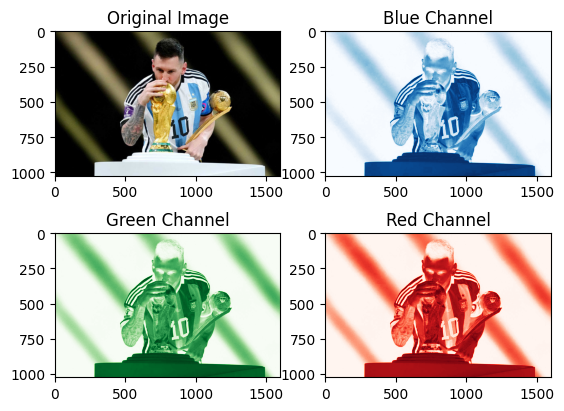

In [9]:
# 2)Read an image and display the RGB channel images separately.

import cv2
import matplotlib.pyplot as plt

def display_rgb_channels(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Split the image into its RGB channels
    blue_channel, green_channel, red_channel = cv2.split(img)

    # Display the original image and the RGB channels
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(blue_channel, cmap='Blues')
    plt.title('Blue Channel')

    plt.subplot(2, 2, 3)
    plt.imshow(green_channel, cmap='Greens')
    plt.title('Green Channel')

    plt.subplot(2, 2, 4)
    plt.imshow(red_channel, cmap='Reds')
    plt.title('Red Channel')

    plt.show()

# Example usage:
input_image_path = "/content/image.jpg"
display_rgb_channels(input_image_path)

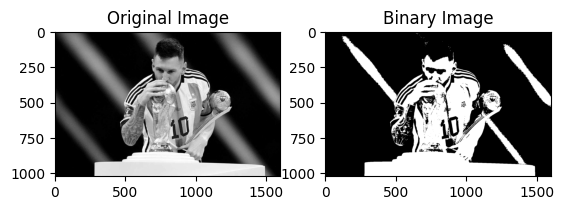

In [10]:
#3)Read an image and convert it into binary image using threshold.


import cv2
import matplotlib.pyplot as plt

def convert_to_binary(image_path, threshold_value=128):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding
    _, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

    # Display the original and binary images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image')

    plt.show()

# Example usage:
input_image_path = "/content/image.jpg"
threshold_value = 128
convert_to_binary(input_image_path, threshold_value)

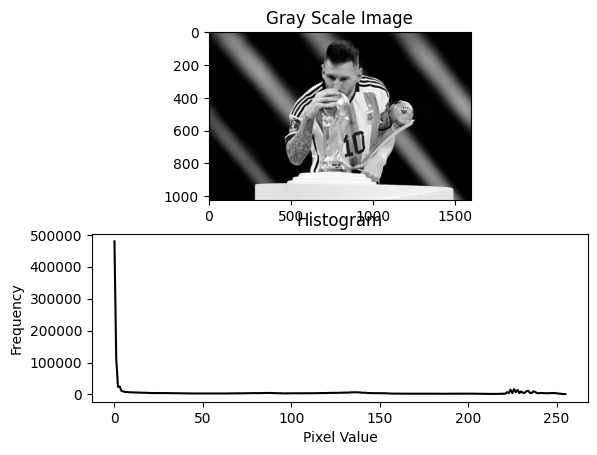

In [11]:
#4)Display the histogram of the gray scale image

import cv2
import matplotlib.pyplot as plt

def display_histogram(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Display the original image
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Gray Scale Image')

    # Display the histogram
    plt.subplot(2, 1, 2)
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.show()

# Example usage:
input_image_path = "/content/converted_image.jpg"
display_histogram(input_image_path)

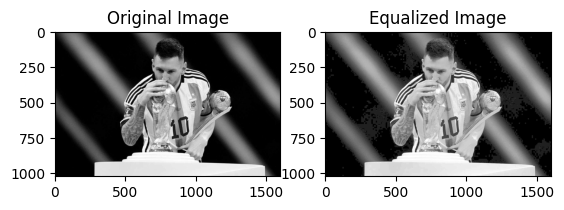

In [12]:
#5) Apply histogram equalization on an image and display the resultant image.

import cv2
import matplotlib.pyplot as plt

def apply_histogram_equalization(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    equalized_img = cv2.equalizeHist(img)

    # Display the original and equalized images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')

    plt.show()

# Example usage:
input_image_path = "/content/image.jpg"
apply_histogram_equalization(input_image_path)

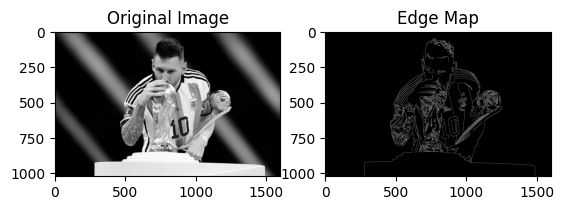

In [13]:
# 6)Display the edge map of an image with any edge detection algorithm


import cv2
import matplotlib.pyplot as plt

def display_edge_map(image_path, low_threshold=50, high_threshold=150):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_img, low_threshold, high_threshold)

    # Display the original and edge map images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Map')

    plt.show()

# Example usage:
input_image_path = "/content/image.jpg"
display_edge_map(input_image_path)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


SVM Accuracy: 0.9764
KNN Accuracy: 0.9701


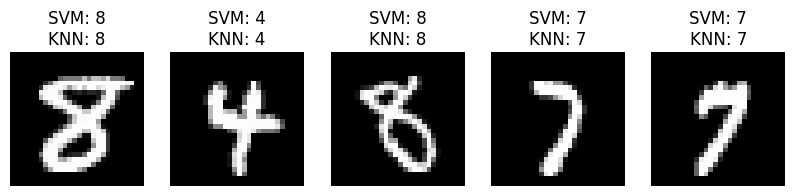

In [14]:
#7) Download any OCR dataset and perform the classification with SVM and KNN. Compare the obtained result


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, neighbors, metrics
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = np.array(mnist.data.astype('int'))
y = np.array(mnist.target.astype('int'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# k-Nearest Neighbors (KNN) Classifier
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Compare the results
svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# Display a few examples and their predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'SVM: {svm_predictions[i]}\nKNN: {knn_predictions[i]}')
    ax.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


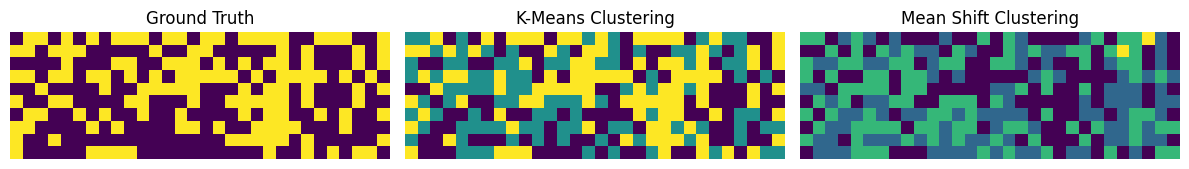

Normalized Mutual Information (NMI) - K-Means: 0.5325
Normalized Mutual Information (NMI) - Mean Shift: 0.5229


In [16]:
# 8)Implement any two segmentation algorithms and compare the efficiency with ground truth


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import normalized_mutual_info_score

# Create a synthetic ground truth image
np.random.seed(42)
ground_truth, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)
ground_truth = StandardScaler().fit_transform(ground_truth)

# Generate image with ground truth labels
ground_truth_labels = np.argmax(ground_truth, axis=1)
ground_truth_labels = ground_truth_labels.reshape((10, 30))

# Plot ground truth
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ground_truth_labels, cmap='viridis')
plt.title('Ground Truth')
plt.axis('off')

# Generate image data for clustering
data, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
kmeans_labels = kmeans_labels.reshape((10, 30))

# Plot K-Means clustering result
plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.axis('off')

# Apply Mean Shift clustering
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=300)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(data)
meanshift_labels = meanshift_labels.reshape((10, 30))

# Plot Mean Shift clustering result
plt.subplot(1, 3, 3)
plt.imshow(meanshift_labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compare clustering results with ground truth
nmi_kmeans = normalized_mutual_info_score(ground_truth_labels.flatten(), kmeans_labels.flatten())
nmi_meanshift = normalized_mutual_info_score(ground_truth_labels.flatten(), meanshift_labels.flatten())

print(f"Normalized Mutual Information (NMI) - K-Means: {nmi_kmeans:.4f}")
print(f"Normalized Mutual Information (NMI) - Mean Shift: {nmi_meanshift:.4f}")

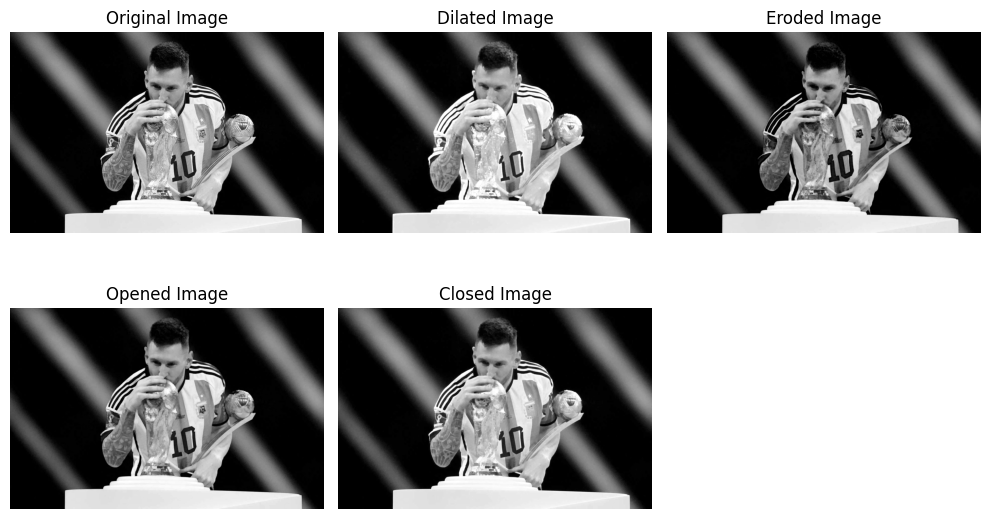

In [17]:
# 9) Input an image and perform the following morphological operations
# i) Dilation
# ii) Erosion
# iii) Opening
# iv) Closing
# Display the results.


import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the input image
image_path = "/content/image.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphological operations
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Morphological Dilation
dilated_image = cv2.dilate(original_image, kernel, iterations=1)

# Morphological Erosion
eroded_image = cv2.erode(original_image, kernel, iterations=1)

# Morphological Opening (Erosion followed by Dilation)
opened_image = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, kernel)

# Morphological Closing (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(original_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

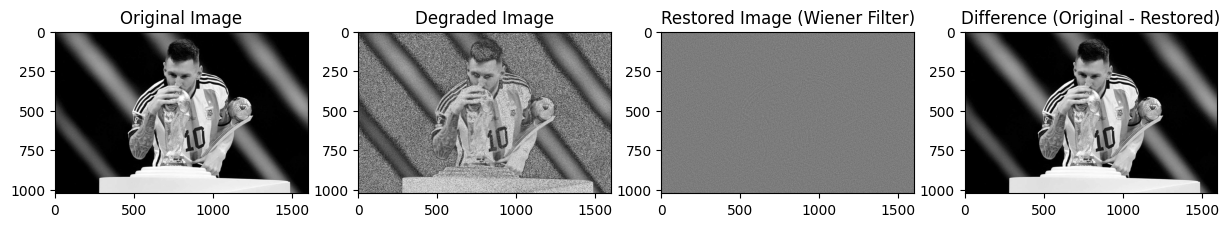

In [18]:
# 10) Implement any image restoration algorithm

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Simulate a degraded image with Gaussian noise
def simulate_degraded_image(original_image_path, psf_size=5, noise_std=25):
    # Load the original image
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if original_image is None:
        print(f"Error: Unable to load the image at {original_image_path}")
        return None

    # Simulate a point spread function (PSF)
    psf = np.ones((psf_size, psf_size)) / psf_size**2

    # Apply the PSF to the image (simulate degradation)
    blurred_image = cv2.filter2D(original_image, -1, psf)

    # Add Gaussian noise to simulate the degraded image
    degraded_image = blurred_image + np.random.normal(0, noise_std, blurred_image.shape).astype(np.uint8)

    return original_image, degraded_image

# Wiener filter for image restoration
def wiener_filter(degraded_image, noise_std, alpha=0.01):
    # Estimate the power spectral density (PSD) of the degraded image
    psd_degraded = np.abs(np.fft.fft2(degraded_image))**2 / np.prod(degraded_image.shape)

    # Estimate the power spectral density (PSD) of the noise
    psd_noise = np.abs(np.fft.fft2(np.random.normal(0, noise_std, degraded_image.shape)))**2 / np.prod(degraded_image.shape)

    # Wiener filter
    wiener_filter = np.conj(psd_degraded) / (np.abs(psd_degraded)**2 + alpha*np.abs(psd_noise)**2)
    restored_image = np.fft.ifft2(np.fft.fft2(degraded_image) * wiener_filter).real

    return restored_image

# Specify the path to your original image
original_image_path = '/content/image.jpg'

# Simulate a degraded image
original_image, degraded_image = simulate_degraded_image(original_image_path)

# Check if the degraded image is successfully generated
if degraded_image is not None:
    # Apply Wiener filter for image restoration
    restored_image = wiener_filter(degraded_image, noise_std=25, alpha=0.01)

    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(degraded_image, cmap='gray')
    plt.title('Degraded Image')

    plt.subplot(1, 4, 3)
    plt.imshow(restored_image, cmap='gray')
    plt.title('Restored Image (Wiener Filter)')

    plt.subplot(1, 4, 4)
    plt.imshow(original_image - restored_image, cmap='gray')
    plt.title('Difference (Original - Restored)')

    plt.show()
